In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from scipy.stats import gaussian_kde
import seaborn as sns
%matplotlib inline

/Users/Jackster/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
t = np.loadtxt('check.txt')
day = np.loadtxt('day.txt')
day3 = np.loadtxt('3day.txt')
week = np.loadtxt('week.txt')

In [3]:
def params(a1,a2):
	omega= np.sqrt(a2[:])
	f=omega[:]/(2.0*np.pi)
	T = 1.0/f
	zeta=a1[:]/(2.0*omega)
	return T, zeta

In [4]:
aT, az = params(t[:,0],t[:,1])
medT, medz = np.median(aT),np.median(az)
bT, bz = params(day[:,0],day[:,1])
cT, cz = params(day3[:,0],day3[:,1])
dT, dz = params(week[:,0],week[:,1])

In [11]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

g = sns.FacetGrid(cT, cz, dT, dz, size=4)
g.map(hexbin, "T", "damp", extent=[0, 50, 0, 10])

IndexError: arrays used as indices must be of integer (or boolean) type

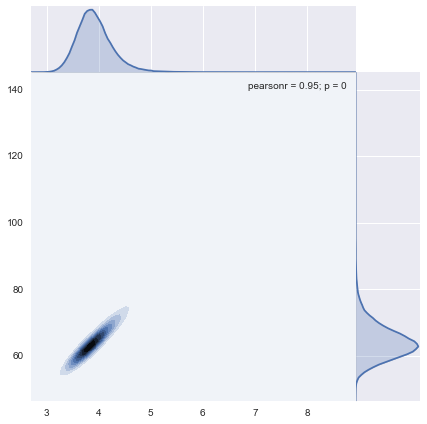

In [20]:
 with sns.axes_style("darkgrid"):
    lims = [(2, 40), (8, 100)]    
    g = sns.jointplot(az, aT,lims,kind="kde", space=0)

    
   

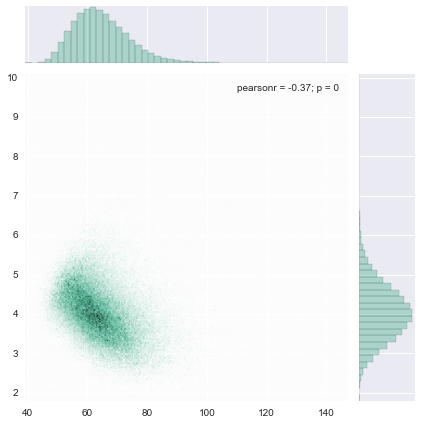

In [8]:
lims = [(2, 40), (8, 100)]  
sns.jointplot(cT, cz,lims, kind="hex", color="#4CB391")

In [ ]:
g = sns.PairGrid(dT, dz, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter, edgecolor='white')
g.map_diag(sns.kdeplot, lw=3)

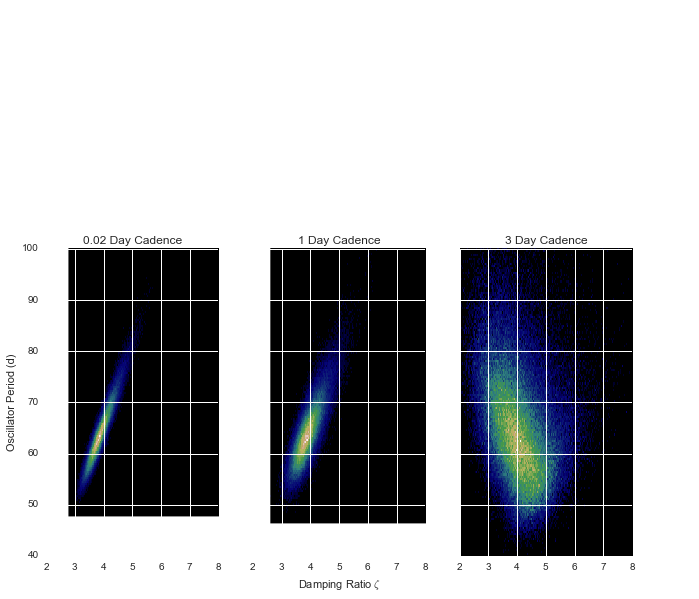

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex='col', sharey='row')
f.set_size_inches( 10.5,5.5)

ax1.hist2d(az, aT, (250,250) ,cmap=cm.gist_earth)
ax1.set_title('0.02 Day Cadence')
ax1.set_ylabel('Oscillator Period (d)')
ax2.hist2d(bz, bT,(250,250),cmap=cm.gist_earth)
ax2.set_title('1 Day Cadence')
ax2.set_xlabel('Damping Ratio $\zeta$')
ax3.hist2d(cz,cT,(250,250),cmap=cm.gist_earth)
ax1.set_ylim([40.0,100.0])
ax2.set_ylim([40.0,100.0])
ax3.set_ylim([40.0,100.0])
ax1.set_xlim([2,8])
ax2.set_xlim([2,8])
ax3.set_xlim([2,8])
plt.gca().set_autoscale_on(False) 
ax1.set_axis_bgcolor('white')
ax2.set_axis_bgcolor('white')
ax3.set_axis_bgcolor('white')
ax3.set_title('3 Day Cadence')
plt.savefig('cadencesDHO.png')
#ax4.hist2d(d1,d2,(50,50))
plt.show()
plt.clf()